# 作業 : (Kaggle)鐵達尼生存預測
***
https://www.kaggle.com/c/titanic

In [21]:
# 做完特徵工程前的所有準備 (與前範例相同)
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
import copy
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

data_path = 'data/'
df = pd.read_csv(data_path + 'titanic_train.csv')

train_Y = df['Survived']
df = df.drop(['PassengerId', 'Survived'] , axis=1)
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
# 因為需要把類別型與數值型特徵都加入, 故使用最簡版的特徵工程
LEncoder = LabelEncoder()
MMEncoder = MinMaxScaler()
for c in df.columns:
    df[c] = df[c].fillna(-1)
    if df[c].dtype == 'object':
        df[c] = LEncoder.fit_transform(list(df[c].values))
    df[c] = MMEncoder.fit_transform(df[c].values.reshape(-1, 1))
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.121348,1.0,0.283951,0.125,0.0,0.769118,0.014151,0.000000,1.000000
1,0.0,0.213483,0.0,0.481481,0.125,0.0,0.876471,0.139136,0.557823,0.333333
2,1.0,0.396629,0.0,0.333333,0.000,0.0,0.983824,0.015469,0.000000,1.000000
3,0.0,0.305618,0.0,0.444444,0.125,0.0,0.072059,0.103644,0.380952,1.000000
4,1.0,0.016854,1.0,0.444444,0.000,0.0,0.694118,0.015713,0.000000,1.000000


In [27]:
# 梯度提升樹擬合後, 將結果依照重要性由高到低排序 (note : D27作業中'Ticket'是第一名特徵, 'Age'是數值特徵中排名最高者)
estimator = GradientBoostingClassifier()
estimator.fit(df.values, train_Y)
feats = pd.Series(data=estimator.feature_importances_, index=df.columns)
feats = feats.sort_values(ascending=False)
feats

Sex         0.444317
Pclass      0.111750
Ticket      0.095774
Fare        0.087847
Name        0.083653
Age         0.073866
Cabin       0.071122
Embarked    0.012246
Parch       0.011602
SibSp       0.007823
dtype: float64

## 先用梯度提升機對鐵達尼生存預測做訓練，再用其特徵重要性回答下列問題

# 作業1
* 將特徵重要性較低的一半特徵刪除後，再做生存率預估，正確率是否有變化?
> 正確率略為降低

In [29]:
# 原始特徵 + 梯度提升樹
train_X = df.values
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8215972695810002

In [37]:
# 高重要性特徵 + 梯度提升樹 
"""
Your Code Here
"""
high_feature = feats[: int(len(feats) / 2)].index
train_X = MMEncoder.fit_transform(df[high_feature])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.811465936966161

# 作業2
* 將特徵重要性最高的兩個特徵做特徵組合，是否能再進一步提升預測力?

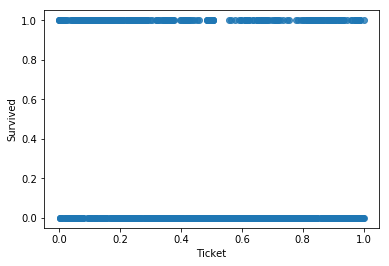

In [48]:
# 觀察重要特徵與目標的分布
# 第一名 : Ticket              
sns.regplot(x=df['Ticket'], y=train_Y, fit_reg=False)

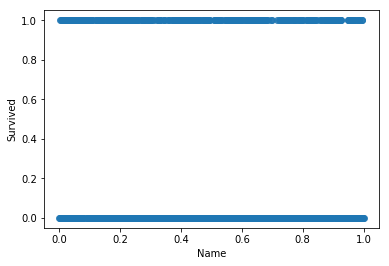

In [49]:
# 第二名 : Name        
sns.regplot(x=df['Name'], y=train_Y, fit_reg=False)


In [52]:
# 製作新特徵看效果
"""
Your Code Here
"""
df['Add_char'] = df['Ticket'] + df['Name']
df['Multi_char'] = df['Ticket'] * df['Name']
df['GO_div1p'] = df['Ticket'] / (df['Name']+1)
df['OG_div1p'] = df['Name'] / (df['Ticket']+1)
print(df.shape)
train_X = MMEncoder.fit_transform(df)
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

(891, 14)


0.8159602480612896

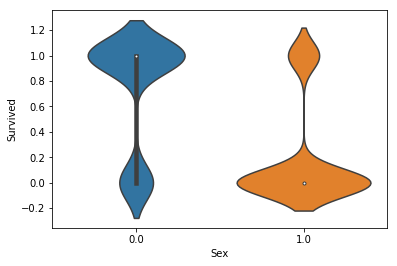

In [53]:
sns.violinplot(x=df['Sex'], y=train_Y)

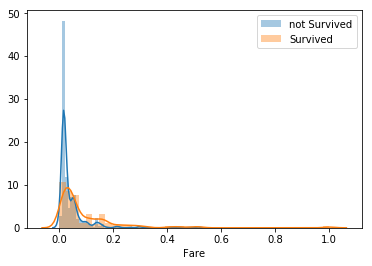

In [66]:
sns.distplot(df[train_Y == 0]['Fare'])
sns.distplot(df[train_Y == 1]['Fare'])
plt.legend(['not Survived', 'Survived'])

In [65]:
df['Add_char'] = df['Sex'] + df['Fare']
df['Multi_char'] = df['Sex'] * df['Fare']
df['GO_div1p'] = df['Sex'] / (df['Fare']+1)
df['OG_div1p'] = df['Fare'] / (df['Sex']+1)
print(df.shape)
train_X = MMEncoder.fit_transform(df)
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

(891, 14)


0.8215973405083433